In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [52]:
#!pip install scikit-learn

In [53]:
df=pd.read_csv(r"concrete_data.csv")

In [54]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


**Observations :** since the output column is continuous this is a regression problem

# Data cleaning and preprocessing

In [55]:
#Check the shape
df.shape

(1030, 9)

In [56]:
#info
df.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observation:All columns have correct data type

In [57]:
#stats
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Observations :** From the above we can see that ingredients like fly_ash,superplasticizers,blast_furnace_slag are not mandatory to compose a concrete mixture which is actually true

In [58]:
#check for null values
df.isnull().sum()             

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

 No null values

In [59]:
#checking duplicate values
df.duplicated().sum()

25

In [60]:
#Treat duplicate values
df.drop_duplicates(inplace=True)

In [61]:
#checking duplicates again
df.duplicated().sum()

0

In [62]:
#current shape
df.shape

(1005, 9)

# EDA

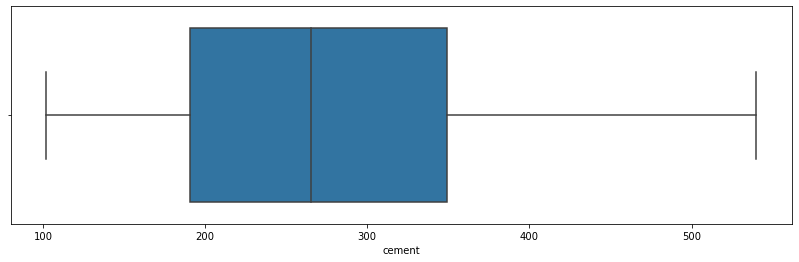

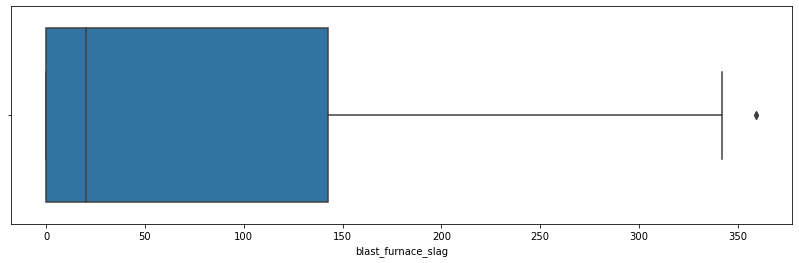

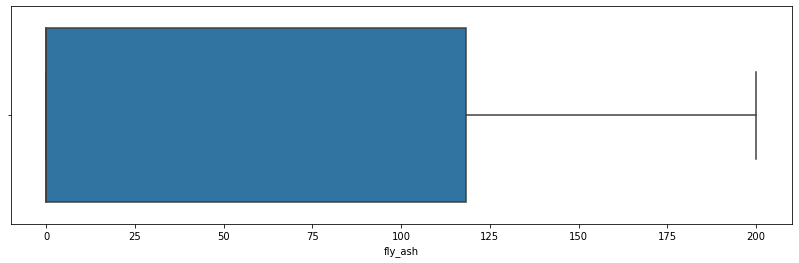

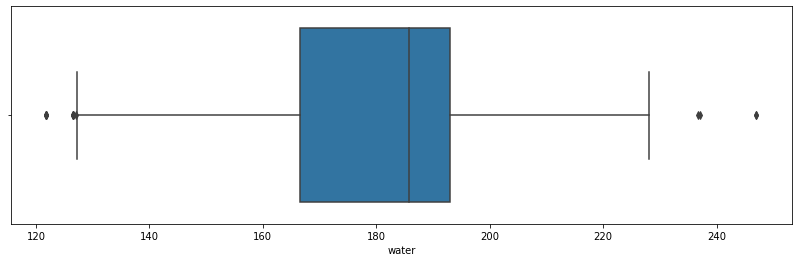

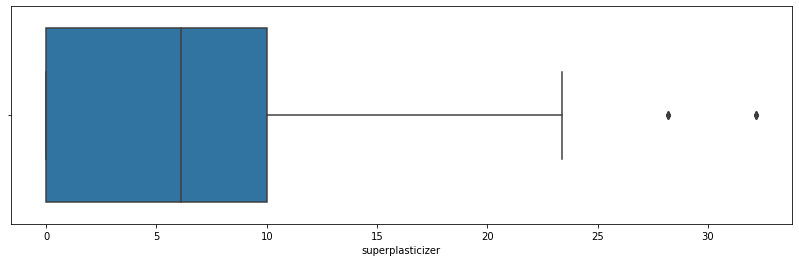

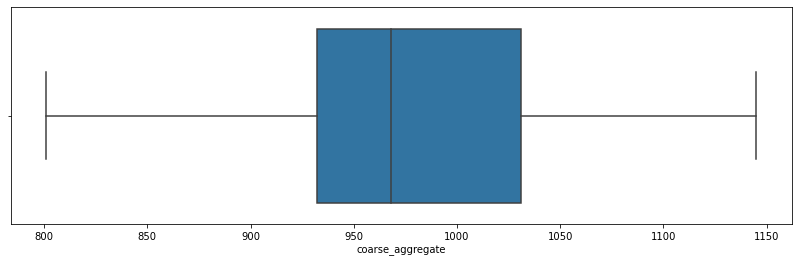

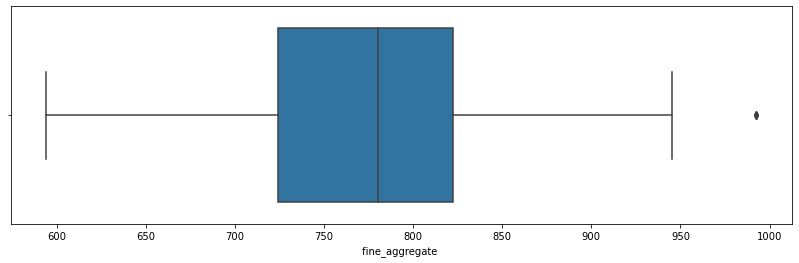

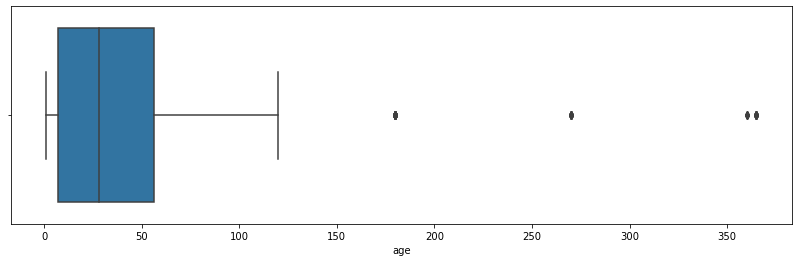

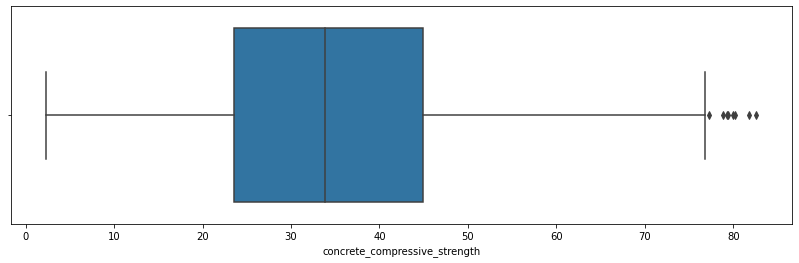

In [63]:
for column in df.columns:
    plt.figure(figsize=(14,4))
    sns.boxplot(x=column,data=df);
    

**Observations :** Some columns shows outliers.Age column appears to have the maximum outliers.For now we are keeping them without treatment

In [64]:
#correlation among the input variables
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
fly_ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fine_aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


<AxesSubplot:>

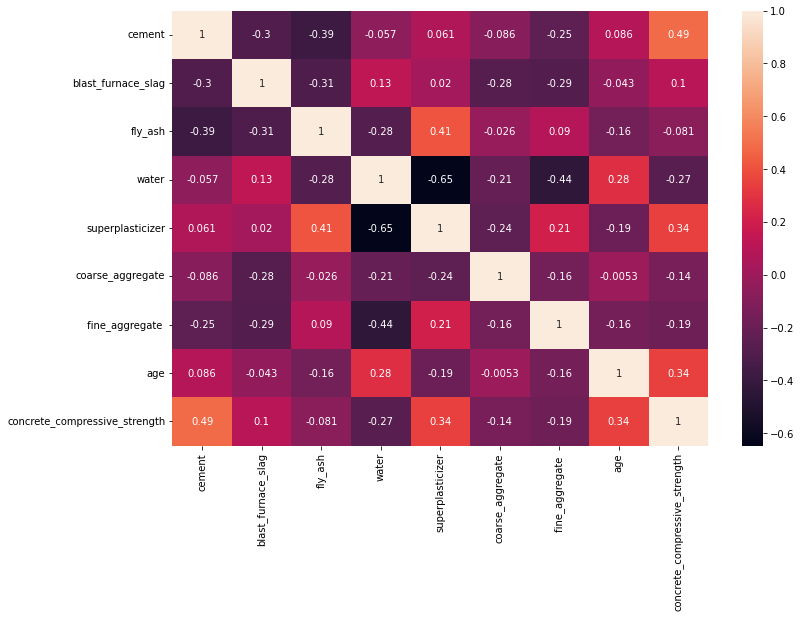

In [65]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True)

**Observations :**
1. Cement is the best predictor, shows strong correlation.
2. blast_furnace_slag, fly_ash are very weak predictors.
3. superplasticizer and fly_ash shows strong correlation.
4. superplasticizer and fly_ash shows average correlation with compressive strength.
5. Water shows a negative correlation with strength
6. water and superplasticizer shows strong negative correlation


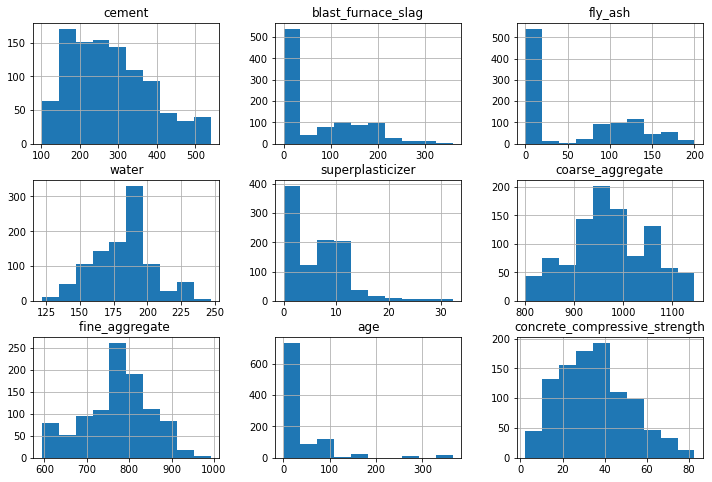

In [66]:
#Univariate analysis

#histogrm
df.hist(figsize=(12,8));

**Observation:** The features of the dataset are not normally distributed, so there is a need to ake them normally distributed. In order to be unbiased let's split the data in train-val-test

In [67]:
X=df.drop(['concrete_compressive_strength'],axis=1)
y=df['concrete_compressive_strength']

In [68]:
print(X.shape)
print(y.shape)

(1005, 8)
(1005,)


In [69]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [70]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(804, 8)
(804,)
(201, 8)
(201,)


In [71]:
X_train.skew()


cement                0.622227
blast_furnace_slag    0.891577
fly_ash               0.474241
water                -0.014262
superplasticizer      1.070548
coarse_aggregate     -0.083320
fine_aggregate       -0.266468
age                   3.489360
dtype: float64

**Observation :**
1. Cement, blast_furnace_slag, fly_ash, fly_ash and age are highly skewed
2. Water, coarse_aggregate and fine_aggregate are nearly normally distributed and shows less skewness i.e., lose to zero. 

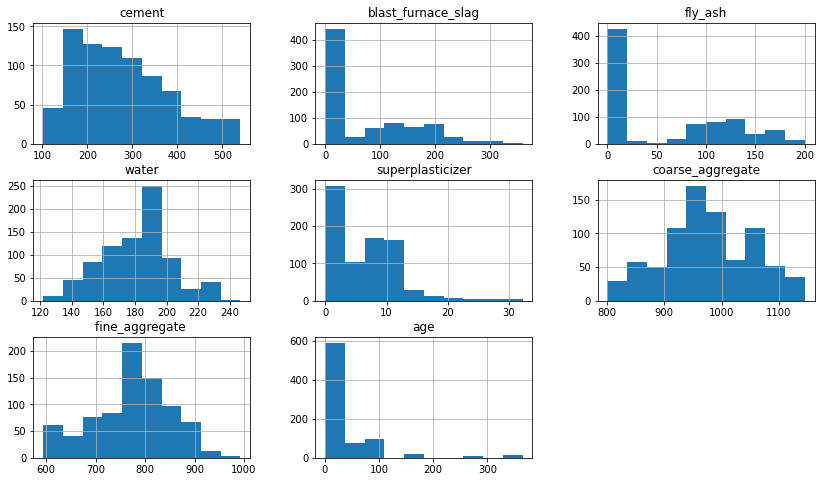

In [72]:
X_train.hist(figsize=(14,8));

In [73]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
X_train_transformed_arr=pt.fit_transform(X_train)
X_test_transformed_arr=pt.fit_transform(X_test)

In [74]:
X_train_transformed=pd.DataFrame(X_train_transformed_arr,columns=X_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed_arr)
from scipy import stats

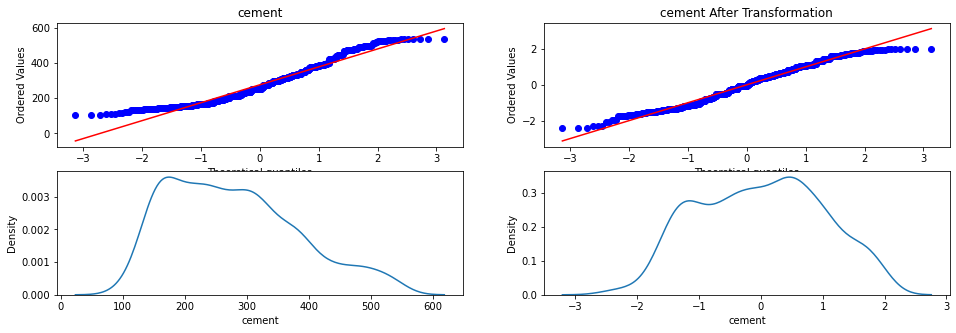

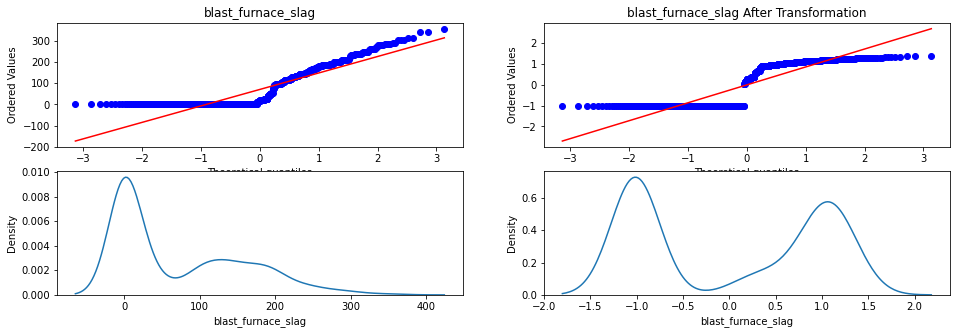

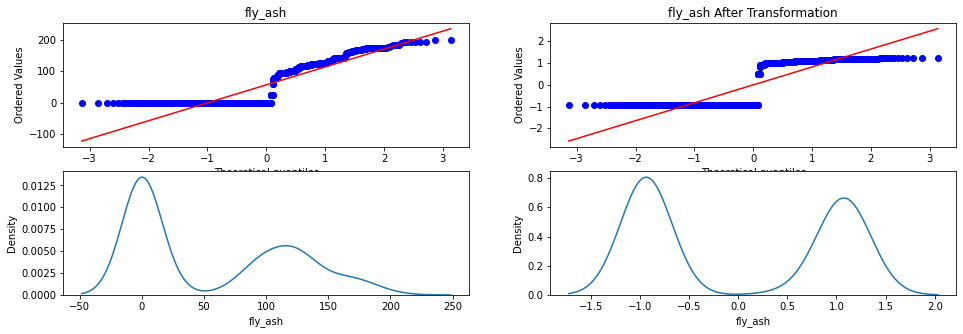

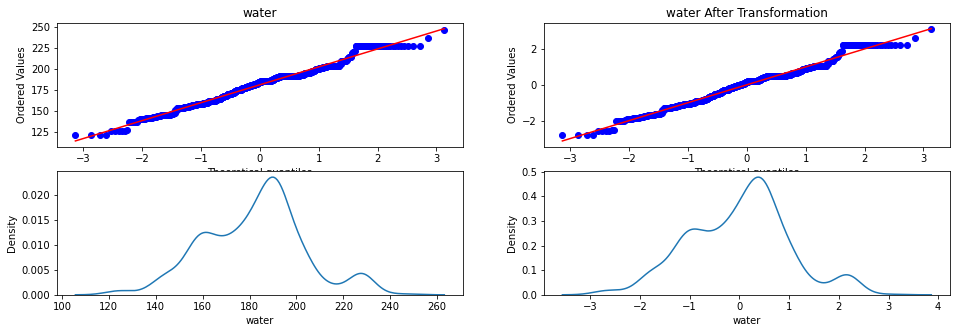

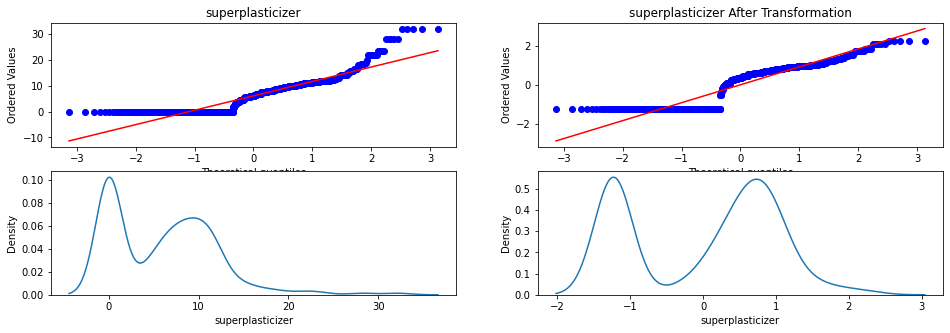

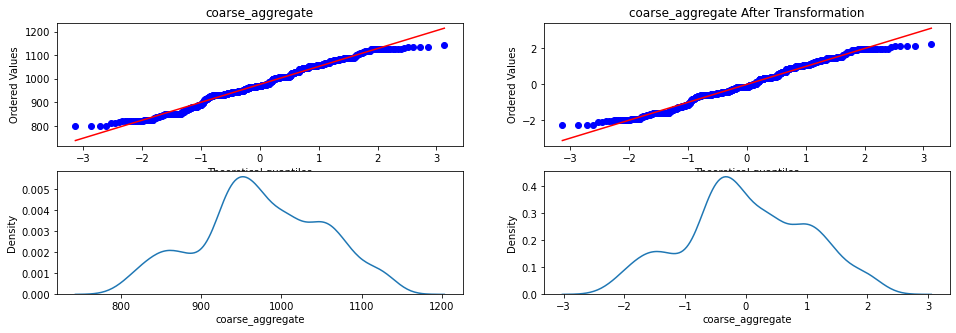

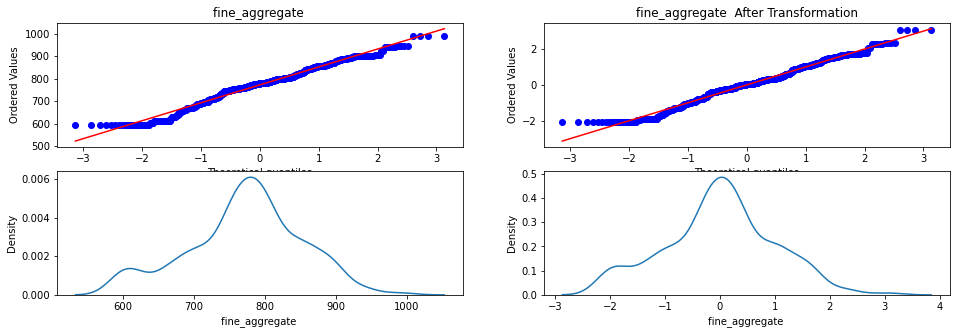

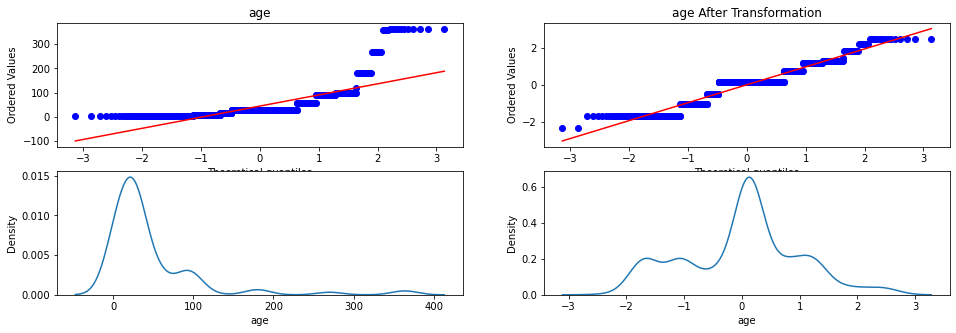

In [75]:
#visualising their QQPlots
for col in X.columns:
    plt.figure(figsize=(16,5))
    plt.subplot(2,2,1)
    stats.probplot(x=X_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.subplot(2,2,2)
    stats.probplot(x=X_train_transformed[col],dist='norm',plot=plt)
    plt.title(label=col+' After Transformation')
    plt.subplot(2,2,3)
    sns.kdeplot(x=X[col])
    plt.subplot(2,2,4)
    sns.kdeplot(x=X_train_transformed[col])
    plt.show()

In [76]:
X_train_transformed.skew()

cement               -0.002602
blast_furnace_slag    0.049490
fly_ash               0.143783
water                 0.001197
superplasticizer     -0.146984
coarse_aggregate     -0.021014
fine_aggregate       -0.012291
age                  -0.000726
dtype: float64

**Observation :** The above plots shows that the features have become more normally distributed than they were before. The                         skewness values confirms that after transformation our data has become normally distributed 

In [77]:
X_train_transformed

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,-1.136060,1.009551,1.098908,-0.282171,0.567645,0.380459,-0.378572,1.283286
1,0.188271,0.901303,0.516204,-0.971068,0.932283,1.122401,0.069635,-1.691529
2,0.558721,1.195429,-0.936335,-1.203212,1.203059,-1.604311,1.384697,-1.059322
3,0.443935,1.179183,-0.936335,1.027709,-1.229347,-0.157742,-1.696032,1.186032
4,-0.442512,0.676986,1.086336,-1.893104,0.997589,1.312199,0.200327,-1.691529
...,...,...,...,...,...,...,...,...
799,0.186363,0.969096,0.983162,0.423217,0.466754,-0.403638,-1.321975,0.124582
800,0.874454,0.267511,1.129167,-1.282070,0.903433,-0.461919,0.307764,-1.691529
801,-1.303103,1.234723,-0.936335,0.488739,-1.229347,-0.547212,0.053084,0.124582
802,-0.434098,-1.013913,1.087137,-1.073249,0.941782,1.352990,0.228709,0.750650


In [78]:
#Similarly for test data
X_test.skew()

cement                0.343620
blast_furnace_slag    0.696488
fly_ash               0.588415
water                 0.269069
superplasticizer      0.485639
coarse_aggregate      0.029706
fine_aggregate       -0.197644
age                   2.589842
dtype: float64

In [79]:
X_test_transformed.skew()

0   -0.045800
1   -0.149693
2    0.288500
3    0.008526
4   -0.124636
5   -0.014101
6   -0.012373
7    0.005433
dtype: float64

# Model Building

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [81]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
svr=SVR()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

model_dict={'lr':lr,'dtr':dtr,'svr':svr,'rfr':rfr,'gbr':gbr,'abr':abr}

In [82]:
values=[]
names=[]
def model_train_output(name,model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2_value=r2_score(y_test,y_pred)
    names.append(name)
    values.append(r2_value)

    return names,values
   

In [83]:
for name, model in  model_dict.items():
    names,r2_score_val=model_train_output(name,model,X_train_transformed,X_test_transformed,y_train,y_test)

In [84]:
new_df=pd.DataFrame(names,columns=['Model'])
new_df['r2_score_transform']=r2_score_val

In [85]:
values=[]
names=[]
def model_train_output(name,model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2_value=r2_score(y_test,y_pred)
    names.append(name)
    values.append(r2_value)

    return names,values
   

In [86]:
for name, model in  model_dict.items():
    names,r2_score_val=model_train_output(name,model,X_train,X_test,y_train,y_test)

In [87]:
new_df['r2_score']=r2_score_val
new_df

,Model,r2_score_transform,r2_score
0,lr,0.803574,0.600537
1,dtr,0.724517,0.838656
2,svr,0.761492,0.252778
3,rfr,0.862524,0.911258
4,gbr,0.824271,0.894716
5,abr,0.751515,0.766521


**Observations :** random forest regressor and gradient boosting regresor are the best performing models, however after box cox transformation the score is reduced 

# Hyperparameter tuning

Tuning the top two best performing models

In [88]:
rfr1=RandomForestRegressor()
gbr1=GradientBoostingRegressor()

### Gradient boosting regressor

In [89]:
params = {
    'learning_rate' : [0.01, 0.1, 1.0,None],
    'n_estimators' : [100, 150, 200,300,400,500],
    'max_depth' : [3, 4, 5]
}

clf = GridSearchCV(gbr1, params,cv=10,n_jobs=-1,verbose=2,scoring='r2')
clf.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0, None],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200, 300, 400, 500]},
             scoring='r2', verbose=2)

In [90]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [91]:
clf.best_score_

0.9228878007856813

### Random Forest Regressor

In [92]:
params = {"n_estimators": [150,200,250,400,500]
             }

clf = GridSearchCV(rfr1, params,cv=10,n_jobs=-1,verbose=2,scoring='r2')
clf.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [150, 200, 250, 400, 500]},
             scoring='r2', verbose=2)

In [93]:
clf.best_score_

0.895137318935738

In [94]:
clf.best_params_

{'n_estimators': 150}

### The best model

In [95]:
best_gbr=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=500)
best_gbr.fit(X_train,y_train)
y_pred=best_gbr.predict(X_test)
r2_score(y_test,y_pred)

0.9323736604723474

**Observation :** This means that our model is able to understand 93.23% of that data

In [104]:
#Mean absolute error
mean_absolute_error(y_test,y_pred)

2.668538164005628

In [105]:
#Mean squared error
mean_squared_error(y_test,y_pred)

17.400594649728326

In [106]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

4.171402000494357

In [107]:
#Random Predictions
x=np.reshape([300,150,100,200,10,1000,650,28], (-1,1)).T

In [108]:
best_gbr.predict(x)

array([37.69949885])

### Model Deployment

In [49]:
import pickle
pickle.dump(best_gbr,open('ConcreteStrengthPredictor.pkl','wb'))

# Project by Mohd Shadab

Deployed App link : https://mohdshadab999-concretestrengthpredictor-app-lf4f8v.streamlit.app/